In [ ]:
"""
Visualization code to display found State Values and the optimum policy on the maze. 
"""
# First, import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

[[9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]
 [9 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 9]
 [9 1 1 1 0 0 0 0 5 0 0 0 0 0 0 0 5 0 0 9]
 [9 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 9]
 [9 0 5 9 9 9 9 9 9 9 9 9 9 9 9 9 9 0 0 9]
 [9 1 0 9 0 0 5 0 0 1 0 0 0 0 0 0 0 1 0 9]
 [9 0 0 9 0 0 9 0 0 9 0 0 0 0 0 9 0 1 0 9]
 [9 0 1 9 0 0 9 0 0 9 1 1 9 9 9 9 0 1 0 9]
 [9 0 0 0 0 0 9 0 0 9 0 0 0 0 0 9 0 1 0 9]
 [9 0 0 0 0 0 9 0 0 9 0 0 0 0 0 9 0 0 0 9]
 [9 9 9 9 9 0 9 0 0 9 9 0 0 0 0 9 0 0 5 9]
 [9 0 0 0 0 0 9 0 0 0 9 0 0 9 0 9 9 9 0 9]
 [9 0 0 9 9 9 9 9 0 0 9 1 1 9 0 0 0 9 0 9]
 [9 0 0 0 0 0 0 9 0 0 9 0 0 9 0 0 0 9 0 9]
 [9 1 1 0 0 0 0 9 0 0 9 0 0 9 0 0 0 0 0 9]
 [9 0 0 0 3 0 0 9 0 0 5 0 0 9 9 9 9 1 1 9]
 [9 0 0 0 0 0 0 1 0 0 5 0 0 0 0 0 0 0 0 9]
 [9 9 9 0 0 0 0 9 9 9 9 9 9 0 5 0 0 5 0 9]
 [9 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 9]
 [9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]]


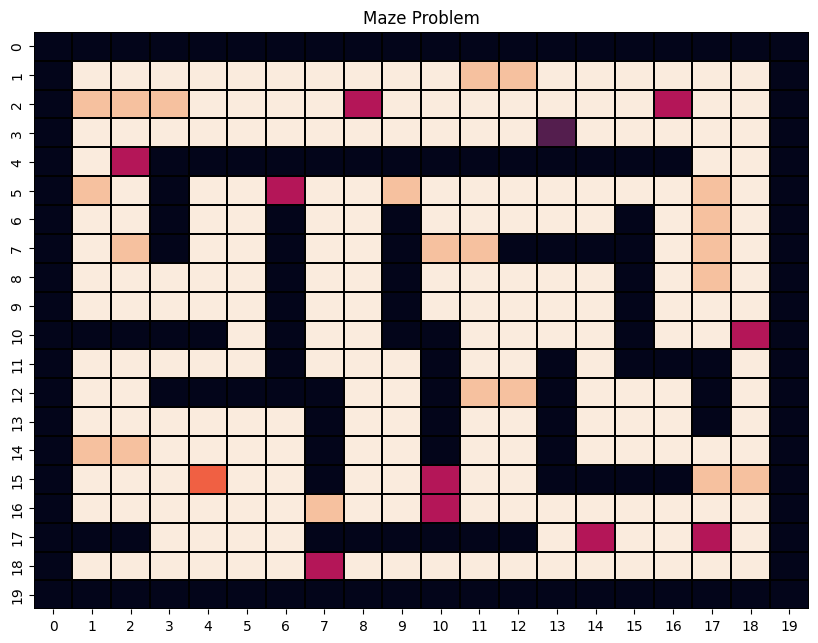

In [27]:
a_desc = ["UP", "DOWN", "LEFT", "RIGHT"]
# 0 - UP
# 1 - DOWN
# 2 - LEFT
# 3 - RIGHT

""" 
Define and Visualize State Matrix 
See https://seaborn.pydata.org/generated/seaborn.heatmap.html for more info on arguments
"""
maze = \
    np.array([
        ['W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W'],
        ['W','S','S','S','S','S','S','S','S','S','S','B','B','S','S','S','S','S','S','W'],
        ['W','B','B','B','S','S','S','S','O','S','S','S','S','S','S','S','O','S','S','W'],
        ['W','S','S','S','S','S','S','S','S','S','S','S','S','G','S','S','S','S','S','W'],
        ['W','S','O','W','W','W','W','W','W','W','W','W','W','W','W','W','W','S','S','W'],
        ['W','B','S','W','S','S','O','S','S','B','S','S','S','S','S','S','S','B','S','W'],
        ['W','S','S','W','S','S','W','S','S','W','S','S','S','S','S','W','S','B','S','W'],
        ['W','S','B','W','S','S','W','S','S','W','B','B','W','W','W','W','S','B','S','W'],
        ['W','S','S','S','S','S','W','S','S','W','S','S','S','S','S','W','S','B','S','W'],
        ['W','S','S','S','S','S','W','S','S','W','S','S','S','S','S','W','S','S','S','W'],
        ['W','W','W','W','W','S','W','S','S','W','W','S','S','S','S','W','S','S','O','W'],
        ['W','S','S','S','S','S','W','S','S','S','W','S','S','W','S','W','W','W','S','W'],
        ['W','S','S','W','W','W','W','W','S','S','W','B','B','W','S','S','S','W','S','W'],
        ['W','S','S','S','S','S','S','W','S','S','W','S','S','W','S','S','S','W','S','W'],
        ['W','B','B','S','S','S','S','W','S','S','W','S','S','W','S','S','S','S','S','W'],
        ['W','S','S','S','S','S','S','W','S','S','O','S','S','W','W','W','W','B','B','W'],
        ['W','S','S','S','S','S','S','B','S','S','O','S','S','S','S','S','S','S','S','W'],
        ['W','W','W','S','S','S','S','W','W','W','W','W','W','S','O','S','S','O','S','W'],
        ['W','S','S','S','S','S','S','O','S','S','S','S','S','S','S','S','S','S','S','W'],
        ['W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W']])

# This is a random matrix for example purposes. 
# Matrix is defined as 20x20 instead of 18x18 stated in the project description in order to treat borders as wall states
State_Matrix = \
    np.array([[9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9],
              [9,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,9],
              [9,1,1,1,0,0,0,0,5,0,0,0,0,0,0,0,5,0,0,9],
              [9,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,9],
              [9,0,5,9,9,9,9,9,9,9,9,9,9,9,9,9,9,0,0,9],
              [9,1,0,9,0,0,5,0,0,1,0,0,0,0,0,0,0,1,0,9],
              [9,0,0,9,0,0,9,0,0,9,0,0,0,0,0,9,0,1,0,9],
              [9,0,1,9,0,0,9,0,0,9,1,1,9,9,9,9,0,1,0,9],
              [9,0,0,0,0,0,9,0,0,9,0,0,0,0,0,9,0,1,0,9],
              [9,0,0,0,0,0,9,0,0,9,0,0,0,0,0,9,0,0,0,9],
              [9,9,9,9,9,0,9,0,0,9,9,0,0,0,0,9,0,0,5,9],
              [9,0,0,0,0,0,9,0,0,0,9,0,0,9,0,9,9,9,0,9],
              [9,0,0,9,9,9,9,9,0,0,9,1,1,9,0,0,0,9,0,9],
              [9,0,0,0,0,0,0,9,0,0,9,0,0,9,0,0,0,9,0,9],
              [9,1,1,0,0,0,0,9,0,0,9,0,0,9,0,0,0,0,0,9],
              [9,0,0,0,3,0,0,9,0,0,5,0,0,9,9,9,9,1,1,9],
              [9,0,0,0,0,0,0,1,0,0,5,0,0,0,0,0,0,0,0,9],
              [9,9,9,0,0,0,0,9,9,9,9,9,9,0,5,0,0,5,0,9],
              [9,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,9],
              [9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9]])
        


print(State_Matrix)

state_to_position = lambda s: (s // 20, s % 20)

def updateStateMatrix():

    for s in range(num_states):
        x, y = state_to_position(s)
        if maze[x][y] == 'W':
            State_Matrix[x][y] = 9
        elif maze[x][y] == 'S':
            State_Matrix[x][y] = 0
        elif maze[x][y] == 'O':
            State_Matrix[x][y] = 5
        elif maze[x][y] == 'B':
            State_Matrix[x][y] = 1
        elif maze[x][y] == 'G':
            State_Matrix[x][y] = 7
        elif maze[x][y] == 'S':
            State_Matrix[x][y] = 0
        else:
            State_Matrix[x][y] = 3
    
    plt.subplots(figsize=(10,7.5))
    heatmap = sns.heatmap(State_Matrix, fmt='', linewidths=0.25, linecolor='black', cbar= False, cmap= 'rocket_r', vmax=9, vmin=0)
    heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
    plt.title('Maze Problem')
    plt.show()

updateStateMatrix()

In [13]:
num_states = 250
num_actions = 4

s_loc = np.zeros((num_states,2))

# Initialize the reward function
r = np.zeros((num_actions,num_states, num_states))

# Initialize the transition probability function
p = np.zeros((num_actions,num_states, num_states))

maze_col = len(maze[0])
maze_row = len(maze)

# Get the reward for the next state (s_prime)
def getReward(s_prime):
    reward = 0
    
    # The location of the current state in the maze
    i = s_loc[s_prime,0]
    j = s_loc[s_prime,1]
    
    if(maze[i][j] == 'B'):
        reward += -10
    if(maze[i][j] == 'O'):
        reward += -5
    elif(maze[i][j] == 'G'):
        reward += 200
    
    reward += -1
    
    return  reward

# Map between the state and the location in the maze
def mapStateToMaze():
    s = 0
    for i in range(maze_row):
        for j in range(maze_col):
            if(maze[i][j] == 'S' or maze[i][j] == 'B' or maze[i][j] == 'O' or maze[i][j] == 'G'):
                s_loc[s] = [i,j]
                s += 1
    
    return s_loc

s_loc = mapStateToMaze().astype(int)

print("The state location in the maze are: ")
print(s_loc)

# Get state from the location in the maze
def getStateFromMaze(i,j):
    k = np.where((s_loc == (i,j)).all(axis=1))
    if(k[0].size == 0):
        return 0
    else:
        return k[0][0]
            
# Get the next state given the current state and the action
def getNextState(s, a):
    s_prime = 0
    
    # The location of the current state in the maze
    i = s_loc[s,0]
    j = s_loc[s,1]
    
    if(a == 0):
        # Action is UP
        if(maze[i-1][j] != 'W'):
            s_prime = getStateFromMaze(i-1,j)
        else:
            s_prime = s
    elif(a == 1):
        # Action is DOWN
        if(maze[i+1][j] != 'W'):
            s_prime = getStateFromMaze(i+1,j)
        else:
            s_prime = s
    elif(a == 2):
        # Action is LEFT
        if(maze[i][j-1] != 'W'):
            s_prime = getStateFromMaze(i,j-1)
        else:
            s_prime = s
    elif(a == 3):
        # Action is RIGHT
        if(maze[i][j+1] != 'W'):
            s_prime = getStateFromMaze(i,j+1)
        else:
            s_prime = s
    
    # Insert the reward of the going from s to s_prime by taking action a
    r[a][s][s_prime] = getReward(s_prime)
    
    return s_prime


# Calculate the probability of the other states given the current state and action
def getOtherState(s,a):
    for i in range(num_actions):
        if(i != a):
            s_prime = getNextState(s,i)
            p[a][s][s_prime] += prob/3


# Create the probability transition matrix
def createTransitionMatrix(prob):
    for a in range(num_actions):
        for s in range(num_states):
            for s_prime in range(num_states):
                if(s_prime == getNextState(s,a) and s_prime != s):
                    p[a][s][s_prime] = 1-prob
                    getOtherState(s,a)
                elif(getNextState(s,a) == s):
                    p[a][s][s] = 1-prob

getAdjacentStates = lambda s: [getNextState(s,0), getNextState(s,1), getNextState(s,2), getNextState(s,3)]

rewardMatrix = lambda s: [getReward(s_prime) for s_prime in getAdjacentStates(s)]

def createRewardMatrix():
    for a in range(num_actions):
        for s in range(num_states):
            adjStates = getAdjacentStates(s)
            for s_prime in adjStates:
                r[a][s][s_prime] = rewardMatrix(s)[a]
                    

The state location in the maze are: 
[[ 1  1]
 [ 1  2]
 [ 1  3]
 [ 1  4]
 [ 1  5]
 [ 1  6]
 [ 1  7]
 [ 1  8]
 [ 1  9]
 [ 1 10]
 [ 1 11]
 [ 1 12]
 [ 1 13]
 [ 1 14]
 [ 1 15]
 [ 1 16]
 [ 1 17]
 [ 1 18]
 [ 2  1]
 [ 2  2]
 [ 2  3]
 [ 2  4]
 [ 2  5]
 [ 2  6]
 [ 2  7]
 [ 2  8]
 [ 2  9]
 [ 2 10]
 [ 2 11]
 [ 2 12]
 [ 2 13]
 [ 2 14]
 [ 2 15]
 [ 2 16]
 [ 2 17]
 [ 2 18]
 [ 3  1]
 [ 3  2]
 [ 3  3]
 [ 3  4]
 [ 3  5]
 [ 3  6]
 [ 3  7]
 [ 3  8]
 [ 3  9]
 [ 3 10]
 [ 3 11]
 [ 3 12]
 [ 3 13]
 [ 3 14]
 [ 3 15]
 [ 3 16]
 [ 3 17]
 [ 3 18]
 [ 4  1]
 [ 4  2]
 [ 4 17]
 [ 4 18]
 [ 5  1]
 [ 5  2]
 [ 5  4]
 [ 5  5]
 [ 5  6]
 [ 5  7]
 [ 5  8]
 [ 5  9]
 [ 5 10]
 [ 5 11]
 [ 5 12]
 [ 5 13]
 [ 5 14]
 [ 5 15]
 [ 5 16]
 [ 5 17]
 [ 5 18]
 [ 6  1]
 [ 6  2]
 [ 6  4]
 [ 6  5]
 [ 6  7]
 [ 6  8]
 [ 6 10]
 [ 6 11]
 [ 6 12]
 [ 6 13]
 [ 6 14]
 [ 6 16]
 [ 6 17]
 [ 6 18]
 [ 7  1]
 [ 7  2]
 [ 7  4]
 [ 7  5]
 [ 7  7]
 [ 7  8]
 [ 7 10]
 [ 7 11]
 [ 7 16]
 [ 7 17]
 [ 7 18]
 [ 8  1]
 [ 8  2]
 [ 8  3]
 [ 8  4]
 [ 8  5]
 [ 8  7]
 [ 8  8]


## Problem 1

#### Part 1 - Policy Iteration

$
p = 0.02 \\
\gamma = 0.95 \\
\theta = 0.01
$

In [18]:
prob = 0.02
gamma = 0.95
theta = 0.01
    
# Initialize the transition probability function
p = np.zeros((num_actions,num_states, num_states))

createTransitionMatrix(prob)
createRewardMatrix()

pi_0 = np.zeros((num_states)).astype(int)
pi_0 += 2


def policy_iteration(p, r, gamma, theta, pi_0):
    pi = pi_0
    policy_stable = False
    while(policy_stable == False):
        v, delta = policy_evaluation(p,r,gamma,theta,pi)
        pi, policy_stable = policy_improvement(p,r,gamma,v,pi)
    return v, pi

def policy_evaluation(p, r, gamma, theta, initial_pi):
    v_0 = np.zeros((num_states))
    v_1 = np.zeros((num_states))

    while True:
        delta = 0
        v_0 = np.copy(v_1)
        v_1 = np.zeros((num_states))

        for s in range(num_states):
            # v_0[s] = v_1[s]
            a = initial_pi[s]
            
            # v_1[s] = 0
            
            for s_prime in range(num_states):
                if(s != 11 or s_prime != 11):
                    if(p[a][s][s_prime] != 0):
                        v_1[s] += (p[a][s][s_prime] * (r[a][s][s_prime] + (gamma * v_0[s_prime])))
                    else:
                        v_1[s] += 0
            
            v_1[11] =0
            

        for s in range(num_states):
            delta = max(delta, abs(v_0[s] - v_1[s]))
                
            if(delta < theta):
                return v_1,delta
        # print(v_1)


# Generate method for policy improvement in reinforcement learning
def policy_improvement(p, r, gamma, v, pi):
    policy_stable = True
    for s in range(num_states):
        old_action = pi[s]
        q = np.zeros((num_actions))
        
        for a in range(num_actions):
            for s_prime in range(num_states):
                if(p[a][s][s_prime] != 0):
                    q[a] += (p[a][s][s_prime] * (r[a][s][s_prime] + (gamma * v[s_prime])))
                else:
                    q[a] += 0
        
        v_index = np.argwhere(q == np.max(q)).flatten().tolist()
        # if(len(v_index) > 1):
        #     for m in range(len(v_index)):
        #         next_state = getNextState(s,v_index[m])

        #         # The location of the current state in the maze
        #         i = s_loc[next_state,0]
        #         j = s_loc[next_state,1]

        #         if(v_index[m] == 0):
        #             # Action is UP
        #             if(maze[i-1][j] == 'W'):
        #                 v_index.pop(m)
        #         elif(v_index[m] == 1):
        #             # Action is DOWN
        #             if(maze[i+1][j] == 'W'):
        #                 v_index.pop(m)
        #         elif(v_index[m] == 2):
        #             # Action is LEFT
        #             if(maze[i][j-1] == 'W'):
        #                 v_index.pop(m)
        #         elif(v_index[m] == 3):
        #             # Action is RIGHT
        #             if(maze[i][j+1] == 'W'):
        #                 v_index.pop(m)
        # else:
        #     pi[s] = np.argmax(q)
        pi[s] = np.argmax(q)
        
        if(old_action != pi[s]):
            policy_stable = False
            
    # print(v)
    # print(pi)
    return pi, policy_stable

v, pi = policy_iteration(p, r, gamma, theta, pi_0)

print("The value function is: ")
print(v)
print("The optimal policy is: ")
print(pi)

The value function is: 
[1448.94881232 1527.38013873 1610.52493917 1698.11240562 1790.4002416
 1887.64077564 1990.099587   2098.05647976 2211.78657449 2331.61734508
 2442.27721726    0.         2715.75409207 2593.84603065 2460.65417304
 2334.24327814 2214.25277949 2101.06680517 1517.89763185 1601.04609354
 1692.21097529 1784.73955211 1882.24264623 1985.01141001 2093.33028954
 2210.39076286 2330.93932352 2457.98282248 2591.89007905 2717.77465133
 2881.99081364 2734.3087353  2593.10419465 2459.11722519 2328.85109063
 2209.19511632 1600.40417978 1688.56118804 1782.12458394 1880.16579926
 1983.54016779 2092.54237222 2207.47913141 2328.67387006 2456.44798561
 2591.17804709 2733.24332954 2883.04356672 2826.28131583 2883.14963662
 2733.35110795 2591.28157391 2455.71302569 2327.98313678 1517.83235196
 1600.36464293 2327.96243025 2208.34169945 1439.38822143 1511.69450988
 1080.84857081 1140.33017621 1208.83889009 1275.3106769  1345.78734578
 1430.84760722 1509.35450895 1592.54354152 1680.266528

#### Part 2 - Value Iteration

$
V_0(S) = 0
$

In [16]:
prob = 0.02
gamma = 0.95
theta = 0.01

# Initialize the transition probability function
p = np.zeros((num_actions,num_states, num_states))
v_result = np.zeros((num_states))

createTransitionMatrix(prob)
createRewardMatrix()

def vib(p, r, gamma, theta):
    v_0 = np.zeros((num_actions, num_states))
    v_1 = np.zeros((num_actions, num_states))

    while True:
        delta = 0
        v_0 = np.copy(v_1)
        v_1 = np.zeros((num_actions, num_states))

        for s in range(num_states):
            for a in range(num_actions):
        
                # v_1[a][s] = 0

                for s_prime in range(num_states):
                    if(s != 11 or s_prime != 11):
                        if(p[a][s][s_prime] != 0):
                            v_1[a][s] += (p[a][s][s_prime] * (r[a][s][s_prime] + (gamma * v_result[s_prime])))
                        else:
                            v_1[a][s] += 0
        
            # Find the maximum value state for all actions
            v_result[s] = np.max(v_1[:,s])
            
            # Always set the value of the goal state to 0
            v_result[11] = 0

            for i in range(num_actions):
                delta = max(delta, abs(v_0[i][s] - v_1[i][s]))
            
            if(delta < theta):
                return v_result,v_0,delta
        # print(v_0)
        # print(v_result)


v_result,q,delta = vib(p,r,gamma,theta)
# print(v_result)

optimal_policy = []

for i in range(num_states):
    optimal_policy.append(np.argmax(q[:,i]))
    # print(np.max(q[:,i]))

print(optimal_policy)

[3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 0, 1, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0]


[[9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]
 [9 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 9]
 [9 1 1 1 0 0 0 0 5 0 0 0 0 0 0 0 5 0 0 9]
 [9 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 9]
 [9 0 5 9 9 9 9 9 9 9 9 9 9 9 9 9 9 0 0 9]
 [9 1 0 9 0 0 5 0 0 1 0 0 0 0 0 0 0 1 0 9]
 [9 0 0 9 0 0 9 0 0 9 0 0 0 0 0 9 0 1 0 9]
 [9 0 1 9 0 0 9 0 0 9 1 1 9 9 9 9 0 1 0 9]
 [9 0 0 0 0 0 9 0 0 9 0 0 0 0 0 9 0 1 0 9]
 [9 0 0 0 0 0 9 0 0 9 0 0 0 0 0 9 0 0 0 9]
 [9 9 9 9 9 0 9 0 0 9 9 0 0 0 0 9 0 0 5 9]
 [9 0 0 0 0 0 9 0 0 0 9 0 0 9 0 9 9 9 0 9]
 [9 0 0 9 9 9 9 9 0 0 9 1 1 9 0 0 0 9 0 9]
 [9 0 0 0 0 0 0 9 0 0 9 0 0 9 0 0 0 9 0 9]
 [9 1 1 0 0 0 0 9 0 0 9 0 0 9 0 0 0 0 0 9]
 [9 0 0 0 3 0 0 9 0 0 5 0 0 9 9 9 9 1 1 9]
 [9 0 0 0 0 0 0 1 0 0 5 0 0 0 0 0 0 0 0 9]
 [9 9 9 0 0 0 0 9 9 9 9 9 9 0 5 0 0 5 0 9]
 [9 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 9]
 [9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]]


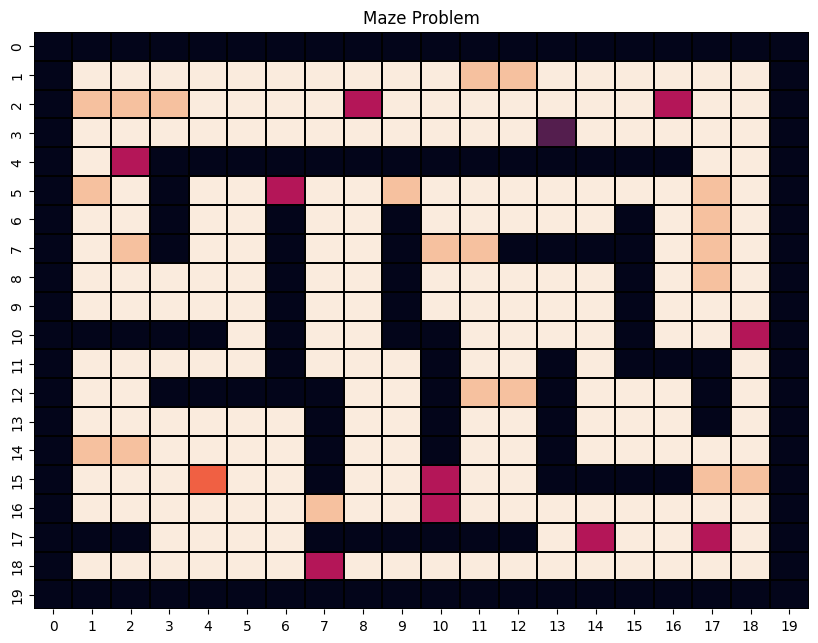